In [8]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

# Loads the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

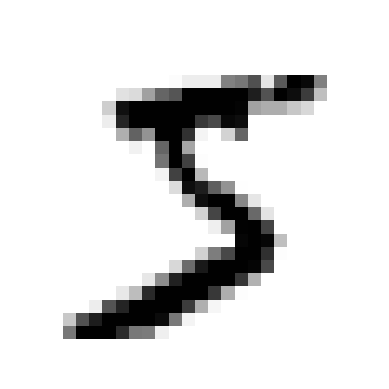

In [11]:
some_digit = X.loc[0].to_numpy()
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [12]:
y[0]

'5'

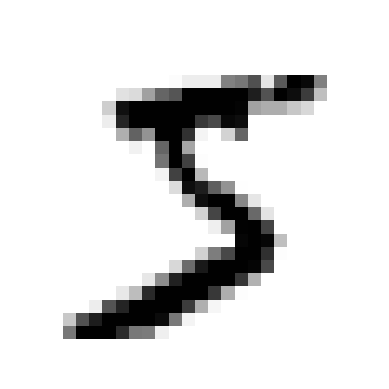

In [13]:
# Testing another example going for "7":

some_digit2 = X.loc[15].to_numpy()
some_digit2_image = some_digit.reshape(28, 28)

plt.imshow(some_digit2_image, cmap="binary")
plt.axis("off")
plt.show()

In [14]:
y[15]

'7'

In [15]:
y = y.astype(np.uint8)

In [16]:
# Splitting into test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#

### Training a Binary Classifier

In [17]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

Using the classifier `Stochastic Gradient Descent (SGD)`. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time.

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [20]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [21]:
# Testing the example from before for "7":

sgd_clf2 = SGDClassifier(random_state=42)
sgd_clf2.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [22]:
sgd_clf.predict([some_digit2])


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

#

### Performance Measures

#### Measuring Accuracy Using Cross-Validation

> Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

Example of Cross-validatipm for 4-folds:

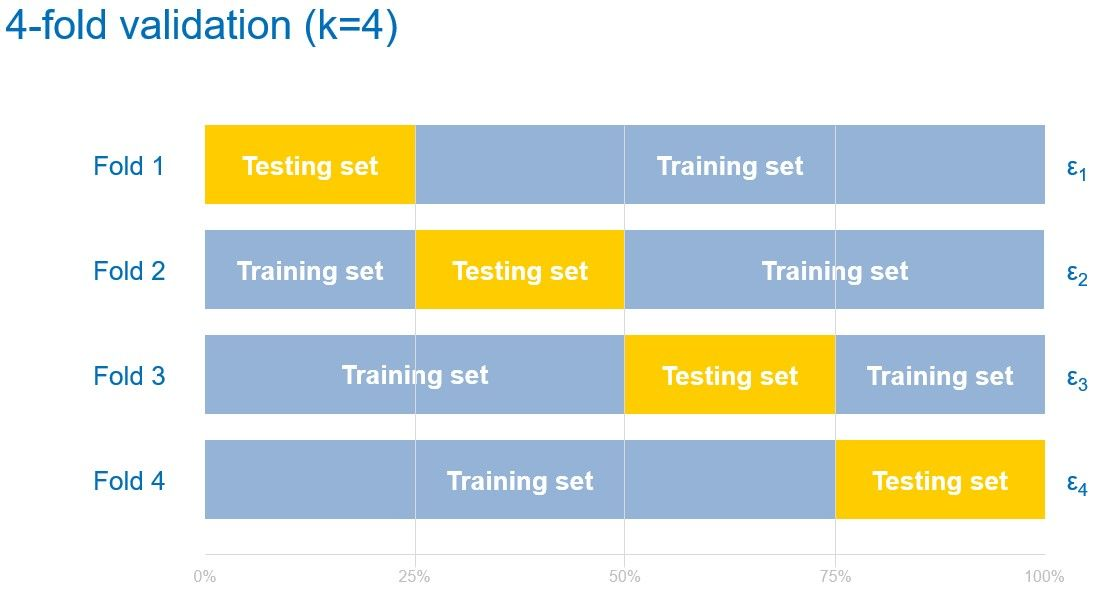

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [24]:
# Our own cross-validation function.

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


##### Stratified Sampling
> A method of sampling that involves the division of a population into smaller sub-groups known as strata.

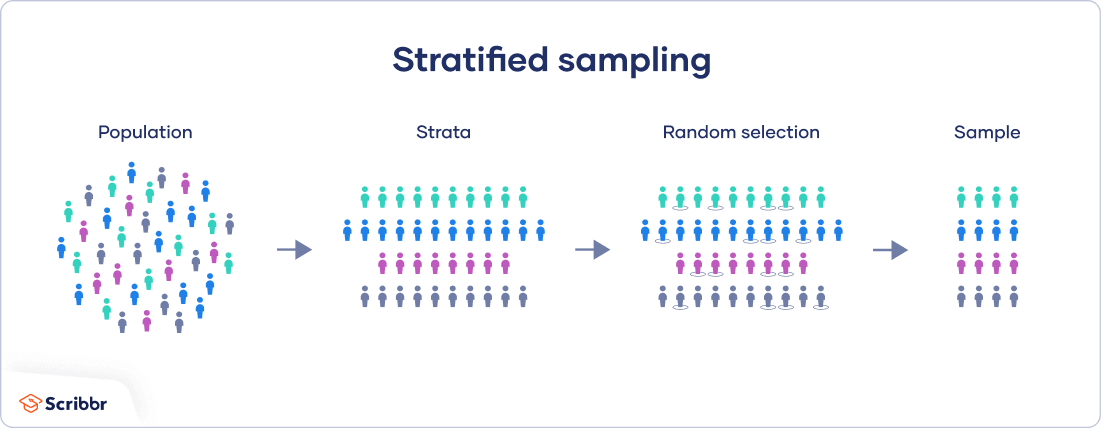

In [25]:
# Using Scikit-Learn's cross_val_score() function:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [26]:
# Trying a dumb classifier that just classifies every single image in the "not-5" class:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [27]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

# It results in over 90% accuracy. This is simply because only about 10% of the images are 5s,
# so if you always guess that an image is not a 5, you will be right about 90% of the time.

array([0.91125, 0.90855, 0.90915])

#

### Confusion Matrix

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in a confusion matrix represents an `actual` class, while each column represents a `predicted` class. 
- The first row of this matrix considers non-5 images `(the negative class):` 53892 of them were correctly classified as non-5s `(they are called true negatives)`, while the remaining 687 were wrongly classified as 5s `(false positives)`.
- The second row considers the images of 5s `(the positive class):` 1891 were wrongly classified as non-5s `(false negatives)`, while the remaining 3530 were correctly classified as 5s `(true positives)`.
- A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal `(top left to bottom right)`.

##### Example of positive and negative classes:
* `Wolf` is a positive class.
* `No wolf` is a negative class.
> Summarize this example `"wolf-prediction"` model using a 2x2 confusion matrix that depicts all four possible outcomes.
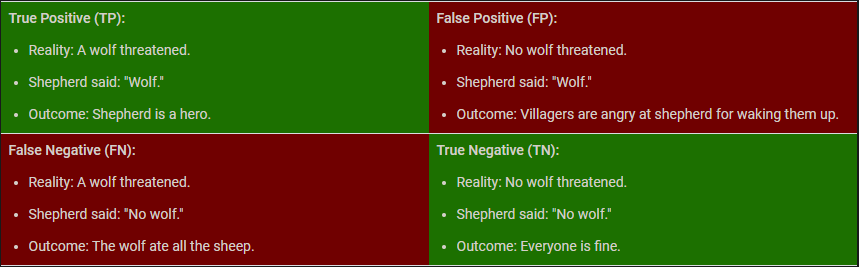

In [30]:
y_train_perfect_predictions = y_train_5    # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

#

### Precision and Recall

> They are both related to the accuracy of predictions made by the model, but they measure different aspects of it. 
* Precision measures the percentage of predictions made by the model that are correct. 
* Recall measures the percentage of relevant data points that were correctly identified by the model.

In [31]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [32]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [33]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

#### Precision/Recall Trade-off

>Using 5's:

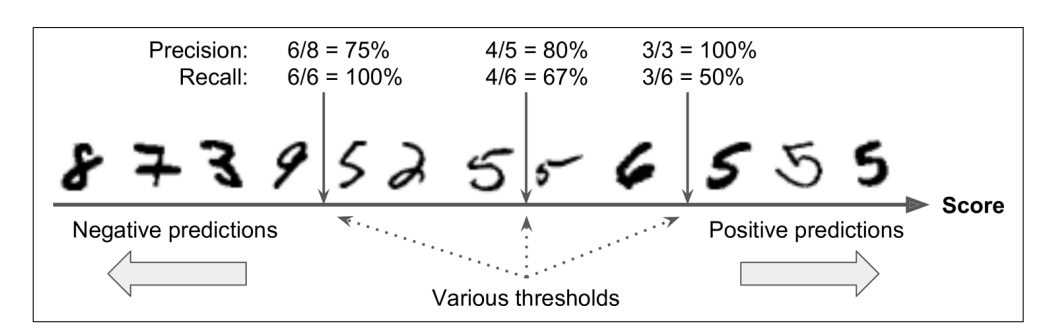

In [34]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [35]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [36]:
# Confirming that raising the threshold decreases recall:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [37]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

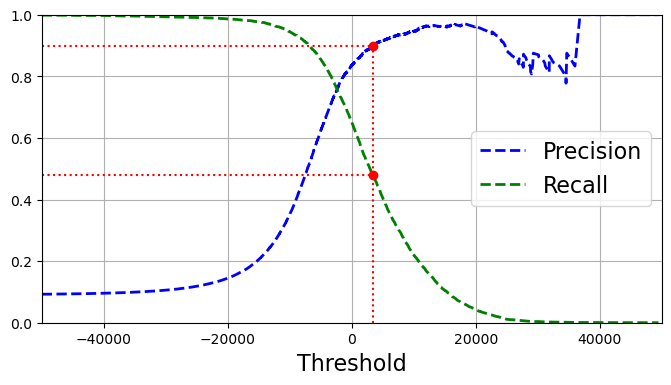

In [38]:
# With these scores, use the precision_recall_curve() function to compute precision and recall for all possible thresholds:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall for all possible thresholds:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
    plt.axis([-50000, 50000, 0, 1])
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.legend(loc="center right", fontsize=16)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.savefig("./images_figures/precision_recall_vs_threshold_plot.png")
plt.show()



In [39]:
(y_train_pred == (y_scores > 0)).all()

True

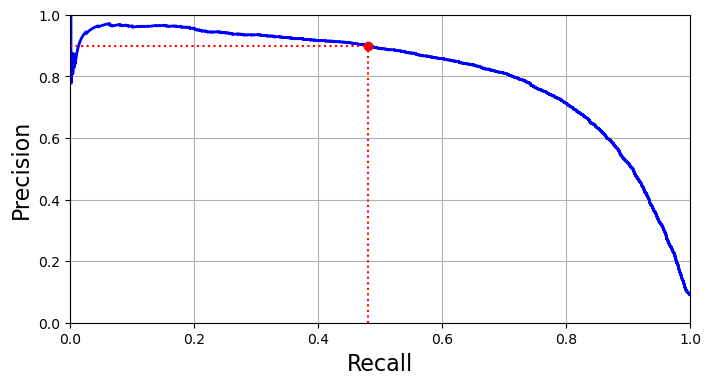

In [40]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.grid(True)
    
plt.figure(figsize=(8, 4))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.savefig("./images_figures/precision_vs_recall_plot.png")
plt.show()

In [41]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [42]:
threshold_90_precision

3370.019499143958

In [43]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [44]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [45]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

#

### The ROC Curve

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

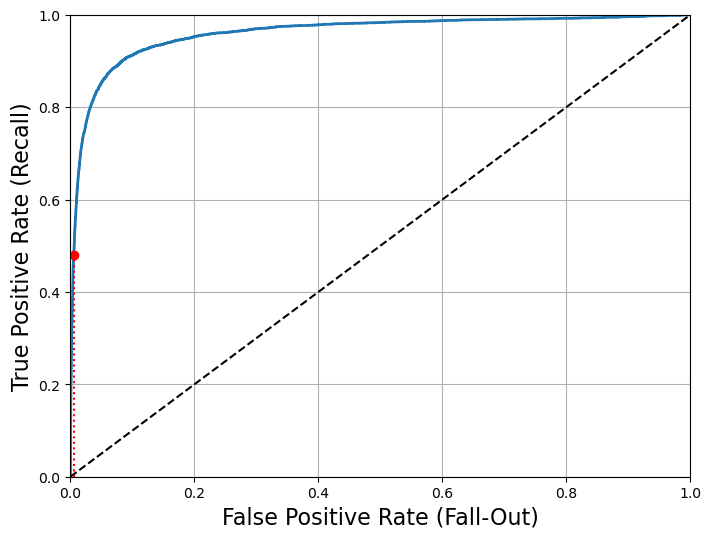

In [47]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")   # Dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (Fall-Out)", fontsize=16)
    plt.ylabel("True Positive Rate (Recall)", fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr > recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.savefig("./images_figures/roc_curve_plot.png")
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [49]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


In [51]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

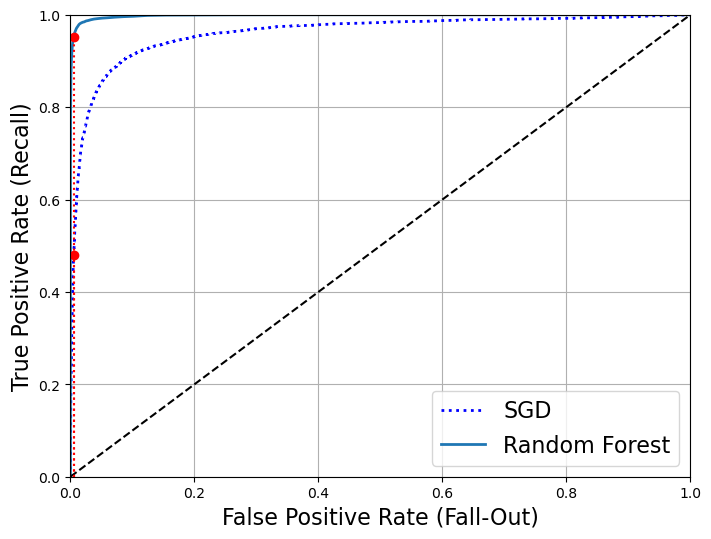

In [52]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.savefig("./images_figures/roc_curve_comparison_plot.png")
plt.show()


In [53]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [54]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [55]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

### Multiclass Classification

In [57]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)   # y_train, not y_train_5
svm_clf.predict([some_digit])

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [58]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [59]:
np.argmax(some_digit_scores)

5

In [60]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [61]:
svm_clf.classes_[5]


5